#CASE STUDY ON UNSUPERVISED LEARNING
The Whole sale customer data is given
1. Read the dataset to the python environment.
2. Try out different clustering models in the Whole sale customer dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.
4. Perform PCA for Dimensionality reduction.
Please

#Loading Libraries

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Dataset

In [2]:
data=pd.read_csv("/content/Wholesale_customers_data.csv")

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#About the dataset

In [4]:
data.shape

(440, 8)

Dataset have 440 rows and 8 columns

In [5]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
for i in data.columns:
  k = data[i].nunique()
  print(i,k)

Channel 2
Region 3
Fresh 433
Milk 421
Grocery 430
Frozen 426
Detergents_Paper 417
Delicassen 403


This gives the number of unique values in each of the columns

In [7]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Data don't had any missing values

In [8]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#Feature reduction

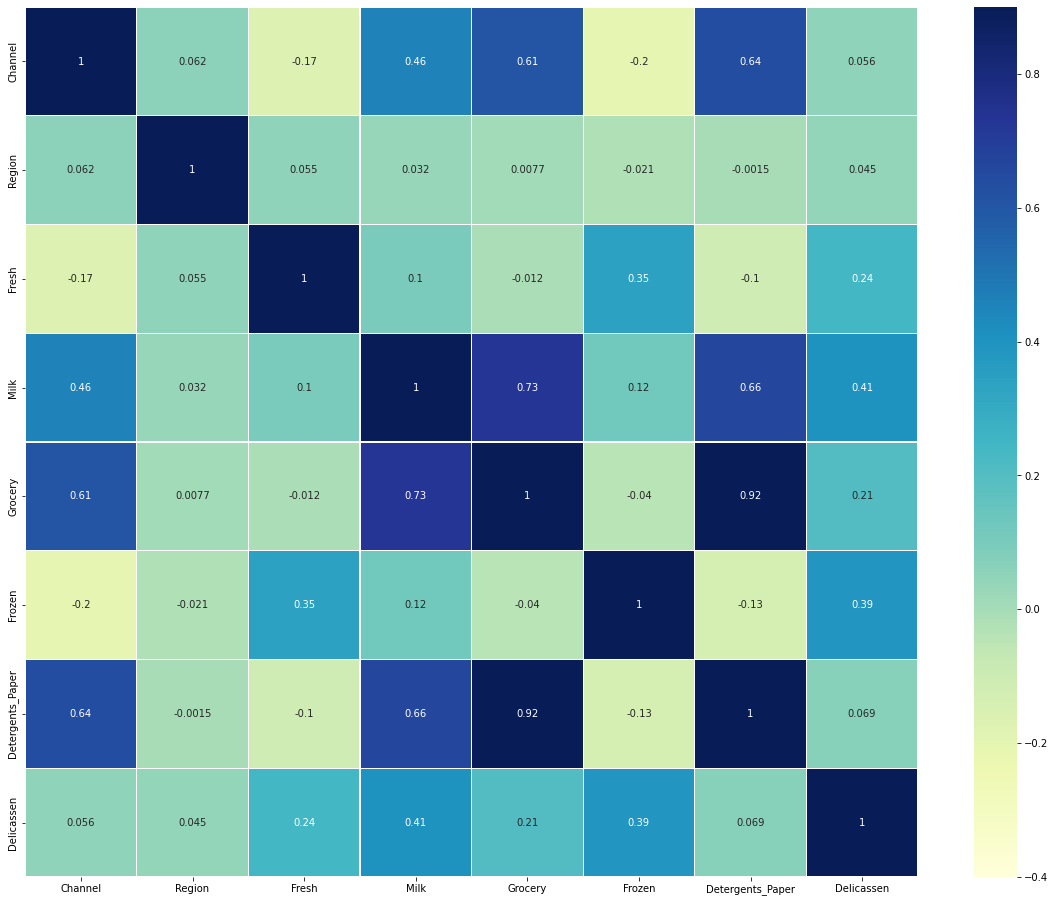

In [9]:
correl=data.corr()
plt.subplots(figsize=(20,16))
sns.heatmap(correl,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

Detergent paper and grocery have high correlation. So we are dropping detergent paper can be dropped

In [10]:
data = data.drop(['Detergents_Paper'],axis=1)

In [11]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Delicassen'],
      dtype='object')

#Unsupervised Algorithms

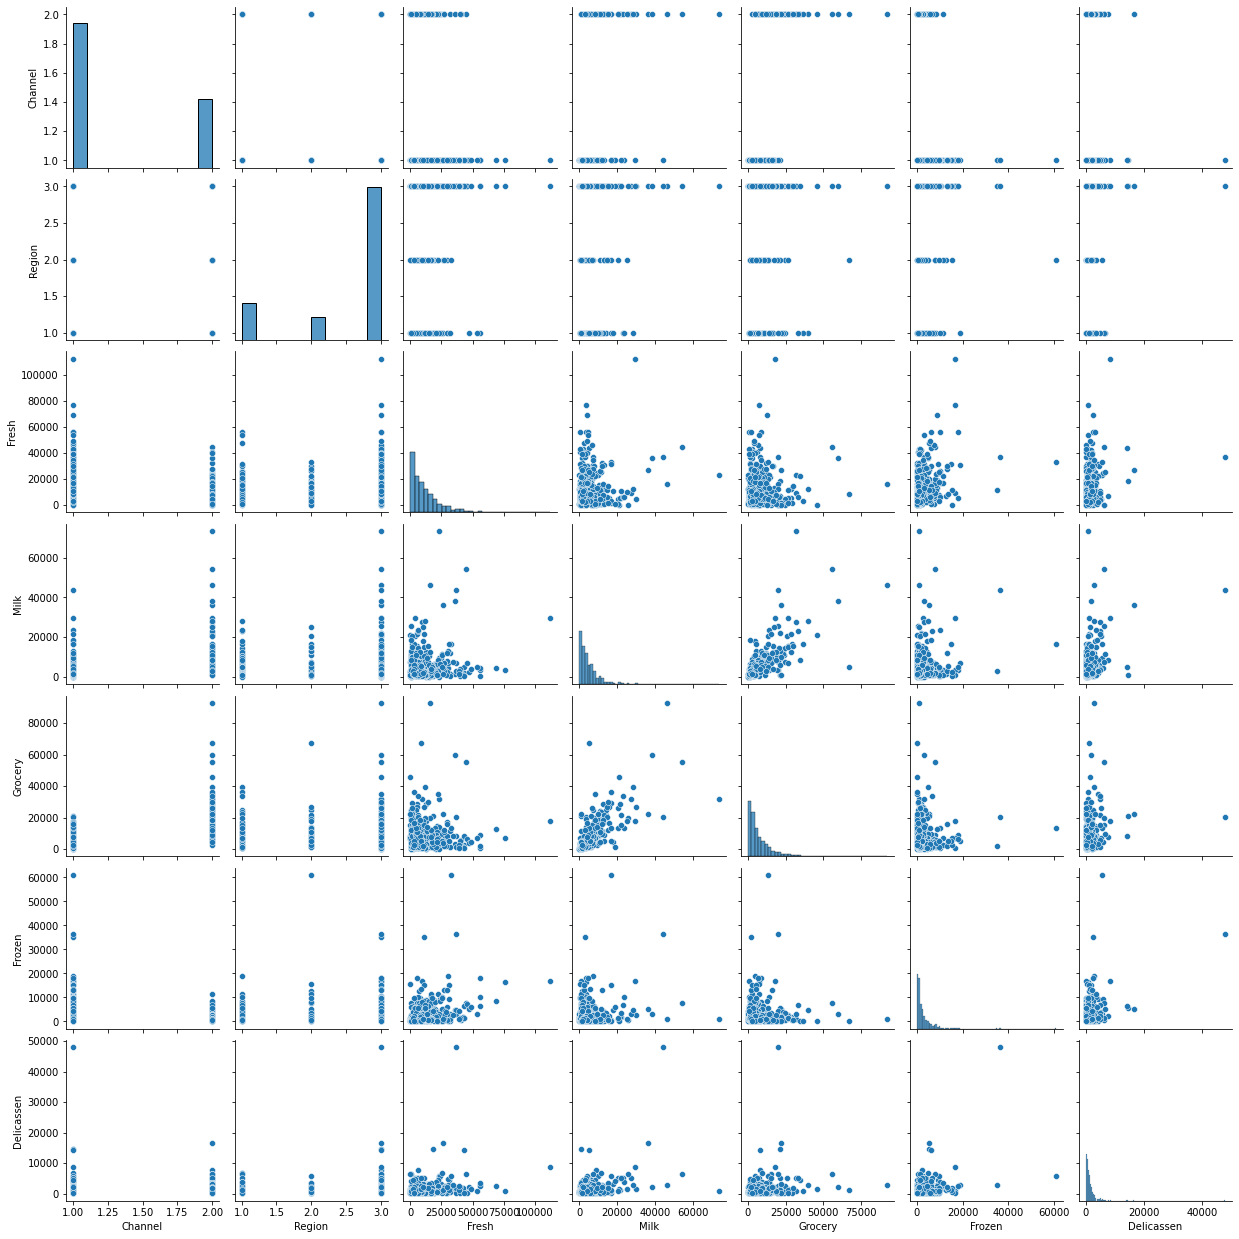

In [12]:
sns.pairplot(data)

In [13]:
x = data.iloc[:,0:8].values

In [14]:
x

array([[    2,     3, 12669, ...,  7561,   214,  1338],
       [    2,     3,  7057, ...,  9568,  1762,  1776],
       [    2,     3,  6353, ...,  7684,  2405,  7844],
       ...,
       [    2,     3, 14531, ..., 30243,   437,  1867],
       [    1,     3, 10290, ...,  2232,  1038,  2125],
       [    1,     3,  2787, ...,  2510,    65,    52]])

In [15]:
x.shape

(440, 7)

#KMeans Clustering

Elbow method for finding optimum number of clusters

147616318104.98172
103238192153.41951
75396684735.69696
61305086844.564545
49285245201.188095
43807080601.53543


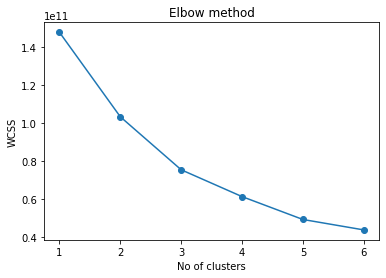

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(x)
    wcss.append(km.inertia_)
    print(km.inertia_)
plt.plot(range(1,7),wcss,marker='o')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

Let us take the optimum number of clusters as 3

In [17]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
ymeans=kmeans.fit_predict(x)

In [18]:
ymeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
ymeans.shape

(440,)

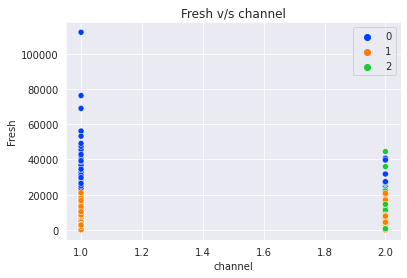

In [20]:
sns.set_style('darkgrid')

sns.scatterplot(
    data=data,
    x='Channel',
    y="Fresh",
    hue=ymeans,
    palette='bright'
)
plt.xlabel("channel")
plt.ylabel("Fresh")
plt.title("Fresh v/s channel")
plt.show()


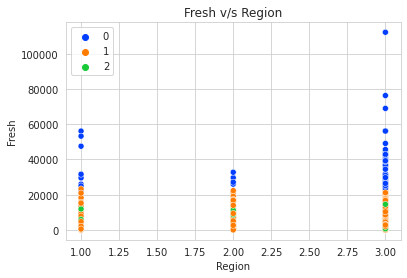

In [21]:
sns.set_style('whitegrid')
sns.scatterplot(
    data=data,
    x='Region',
    y="Fresh",
    hue=ymeans,
    palette='bright'
)
plt.xlabel("Region")
plt.ylabel("Fresh")
plt.title("Fresh v/s Region")
plt.show()

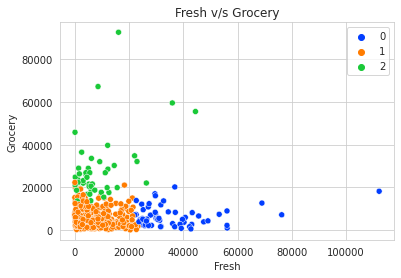

In [22]:
sns.set_style('whitegrid')
sns.scatterplot(
    data=data,
    x="Fresh",
    y="Grocery",
    hue=ymeans,
    palette='bright'
)
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.title("Fresh v/s Grocery")
plt.show()

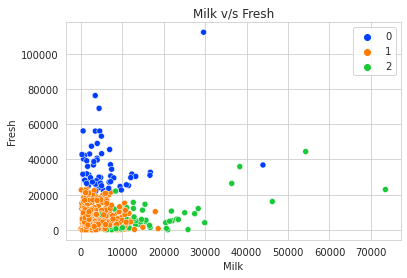

In [23]:
sns.set_style('whitegrid')
sns.scatterplot(
    data=data,
    x="Milk",
    y="Fresh",
    hue=ymeans,
    palette='bright'
)
plt.xlabel("Milk")
plt.ylabel("Fresh")
plt.title("Milk v/s Fresh")
plt.show()

#Agglomative Hierarchial Clustering

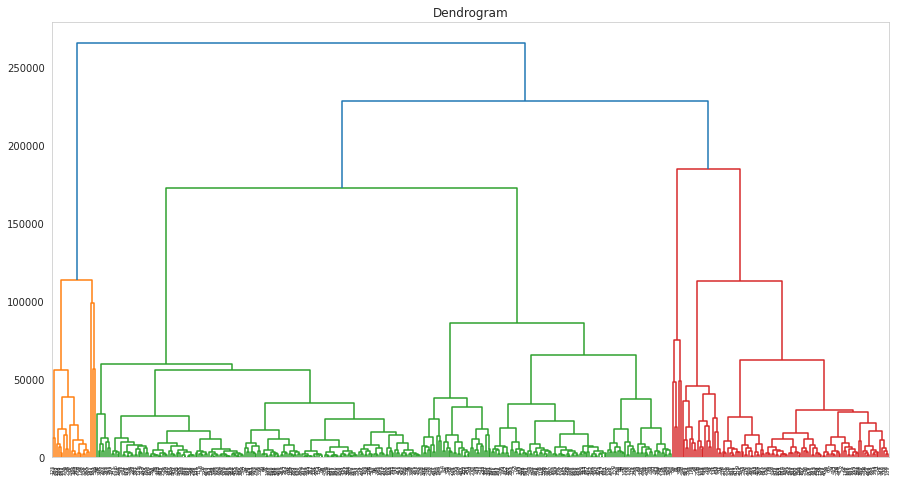

In [24]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,8))
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.grid()
plt.show()

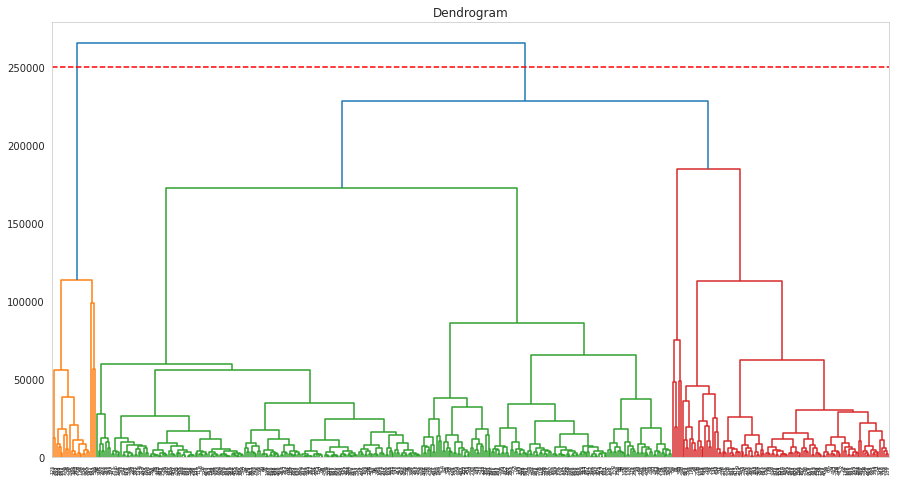

In [25]:
plt.figure(figsize=(15,8))
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.hlines(250000,0,5000,color='red',linestyle='dashed')
plt.grid()
plt.show()

Optimum number of clusters = 2

In [26]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [27]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

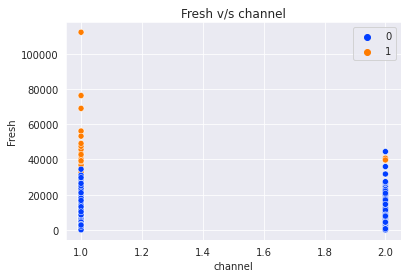

In [28]:
sns.set_style('darkgrid')

sns.scatterplot(
    data=data,
    x='Channel',
    y="Fresh",
    hue=y_hc,
    palette='bright'
)
plt.xlabel("channel")
plt.ylabel("Fresh")
plt.title("Fresh v/s channel")
plt.show()


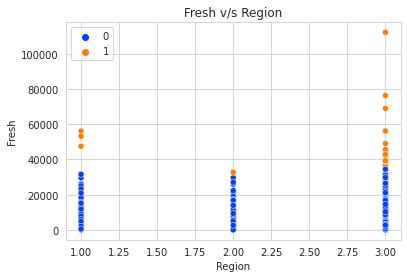

In [29]:
sns.set_style('whitegrid')
sns.scatterplot(
    data=data,
    x='Region',
    y="Fresh",
    hue=y_hc,
    palette='bright'
)
plt.xlabel("Region")
plt.ylabel("Fresh")
plt.title("Fresh v/s Region")
plt.show()

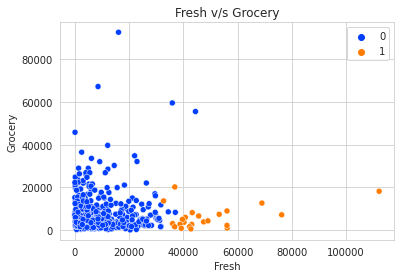

In [30]:
sns.set_style('whitegrid')
sns.scatterplot(
    data=data,
    x="Fresh",
    y="Grocery",
    hue=y_hc,
    palette='bright'
)
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.title("Fresh v/s Grocery")
plt.show()

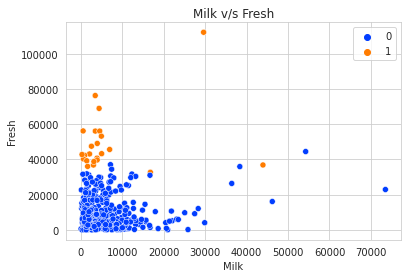

In [31]:
sns.set_style('whitegrid')
sns.scatterplot(
    data=data,
    x="Milk",
    y="Fresh",
    hue=y_hc,
    palette='bright'
)
plt.xlabel("Milk")
plt.ylabel("Fresh")
plt.title("Milk v/s Fresh")
plt.show()

In [32]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
0,2,3,12669,9656,7561,214,1338
1,2,3,7057,9810,9568,1762,1776
2,2,3,6353,8808,7684,2405,7844
3,1,3,13265,1196,4221,6404,1788
4,2,3,22615,5410,7198,3915,5185


In [33]:
for i in data.columns:
  k = data[i].nunique()
  print(i,k)

Channel 2
Region 3
Fresh 433
Milk 421
Grocery 430
Frozen 426
Delicassen 403


In [34]:
data.shape

(440, 7)

Channel and Region are discrete and remaining columns are continuous

#Scaling

In [35]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Delicassen'],
      dtype='object')

In [36]:
a=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']

In [37]:
df=data[a]
df.head()

,Fresh,Milk,Grocery,Frozen,Delicassen
0,12669,9656,7561,214,1338
1,7057,9810,9568,1762,1776
2,6353,8808,7684,2405,7844
3,13265,1196,4221,6404,1788
4,22615,5410,7198,3915,5185


#Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(df)

In [39]:
df=pd.DataFrame(scaled_data,columns= a)

In [40]:
df.head()

,Fresh,Milk,Grocery,Frozen,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,1.299347


In [41]:
new_data = data.copy()

In [42]:
new_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
0,2,3,12669,9656,7561,214,1338
1,2,3,7057,9810,9568,1762,1776
2,2,3,6353,8808,7684,2405,7844
3,1,3,13265,1196,4221,6404,1788
4,2,3,22615,5410,7198,3915,5185


In [43]:
new_data['Fresh']=df['Fresh']
new_data['Grocery']=df['Grocery']
new_data['Milk']=df['Milk']
new_data['Frozen']=df['Frozen']
new_data['Delicassen']=df['Delicassen']

In [44]:
new_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,1.299347


In [45]:
new_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
count,440.000000,440.000000,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.322727,2.543182,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,-8.074349e-18
std,0.468052,0.774272,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00
min,1.000000,1.000000,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-5.402644e-01
25%,1.000000,2.000000,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-3.964005e-01
50%,1.000000,3.000000,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-1.985766e-01
75%,2.000000,3.000000,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,1.048598e-01
max,2.000000,3.000000,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,1.647845e+01


#PCA

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df)
x_pca = pca.transform(df)

In [47]:
x_pca.shape

(440, 2)

In [48]:
pca.explained_variance_ratio_

array([0.41226205, 0.28848929])

In [49]:
pd.DataFrame(pca.components_, columns = df.columns, index=['PCA1','PCA2'])

,Fresh,Milk,Grocery,Frozen,Delicassen
PCA1,0.269665,0.585257,0.482914,0.321487,0.498192
PCA2,0.510629,-0.333839,-0.502992,0.563268,0.239870


In [50]:
x_pca=pd.DataFrame(x_pca)

In [51]:
x_pca.head()

,0,1
0,0.078317,-0.474962
1,0.252945,-0.598015
2,1.178328,0.110139
3,-0.260545,0.866559
4,0.860813,0.896061


In [52]:
x_pca['PCA1']=x_pca[0]
x_pca['PCA2']=x_pca[1]

In [53]:
x_pca.head()

,0,1,PCA1,PCA2
0,0.078317,-0.474962,0.078317,-0.474962
1,0.252945,-0.598015,0.252945,-0.598015
2,1.178328,0.110139,1.178328,0.110139
3,-0.260545,0.866559,-0.260545,0.866559
4,0.860813,0.896061,0.860813,0.896061


In [54]:
x_pca.drop([0,1],axis=1,inplace=True)

In [55]:
x_pca.head()

,PCA1,PCA2
0,0.078317,-0.474962
1,0.252945,-0.598015
2,1.178328,0.110139
3,-0.260545,0.866559
4,0.860813,0.896061


In [56]:
pd.concat([data[['Channel','Region']],x_pca],axis=1)

,Channel,Region,PCA1,PCA2
0,2,3,0.078317,-0.474962
1,2,3,0.252945,-0.598015
2,2,3,1.178328,0.110139
3,1,3,-0.260545,0.866559
4,2,3,0.860813,0.896061
...,...,...,...,...
435,1,3,2.072555,1.231118
436,1,3,0.109571,1.916049
437,2,3,1.843329,-1.794750
438,1,3,-0.659069,0.221548


In [57]:
data1=pd.concat([data[['Channel','Region']],x_pca],axis=1)

In [58]:
data1.head()

,Channel,Region,PCA1,PCA2
0,2,3,0.078317,-0.474962
1,2,3,0.252945,-0.598015
2,2,3,1.178328,0.110139
3,1,3,-0.260545,0.866559
4,2,3,0.860813,0.896061


In [59]:
x=data1.iloc[:,0:4].values

In [60]:
x

array([[ 2.        ,  3.        ,  0.07831737, -0.47496249],
       [ 2.        ,  3.        ,  0.25294515, -0.59801484],
       [ 2.        ,  3.        ,  1.17832756,  0.11013862],
       ...,
       [ 2.        ,  3.        ,  1.84332871, -1.79475035],
       [ 1.        ,  3.        , -0.65906907,  0.22154788],
       [ 1.        ,  3.        , -1.2586883 , -0.3731874 ]])

#KMean Clustering

1388.8405051932455
1055.7894014089607
868.2617083012449
673.2238196613605
516.7164412947287
432.62028561665966
383.43497213939247


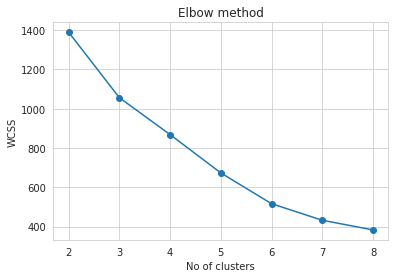

In [61]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,9):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(x)
    wcss.append(km.inertia_)
    print(km.inertia_)
plt.plot(range(2,9),wcss,marker='o')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum numbe rof clusters = 6

In [62]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)
ymeans=kmeans.fit_predict(x)

In [63]:
ymeans

array([0, 0, 0, 1, 5, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       5, 2, 0, 1, 1, 1, 0, 5, 1, 1, 1, 5, 1, 0, 5, 0, 0, 5, 5, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 5, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2,
       1, 0, 1, 1, 5, 5, 1, 5, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 5,
       1, 5, 1, 5, 2, 5, 0, 1, 1, 1, 1, 1, 0, 0, 0, 5, 1, 1, 0, 0, 0, 0,
       1, 0, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 5, 5, 5, 0, 1, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0,
       5, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 5, 5, 3,
       3, 3, 0, 0, 5, 3, 3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 3, 3, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 3, 3, 3, 3, 5, 1, 1, 5, 5, 1, 0, 1, 0, 5, 5, 5, 5,
       1, 5, 1, 5, 1, 1, 1, 0, 3, 3, 3, 3, 0, 3, 3,

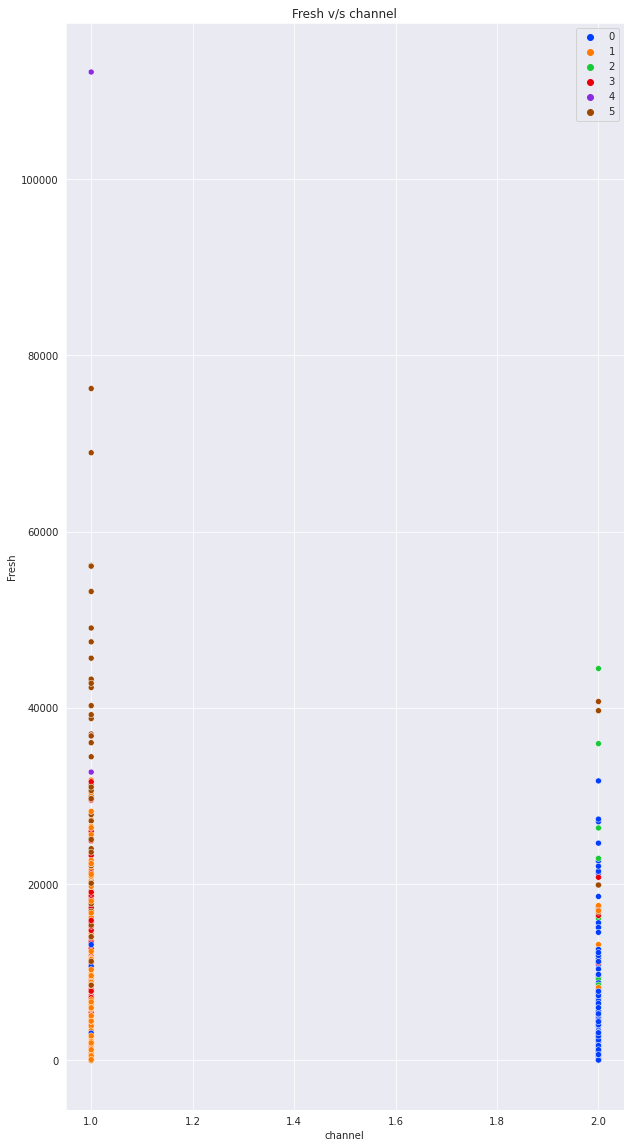

In [64]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,20))
sns.scatterplot(
    data=data,
    x='Channel',
    y="Fresh",
    hue=ymeans,
    palette='bright'
)
plt.xlabel("channel")
plt.ylabel("Fresh")
plt.title("Fresh v/s channel")
plt.show()


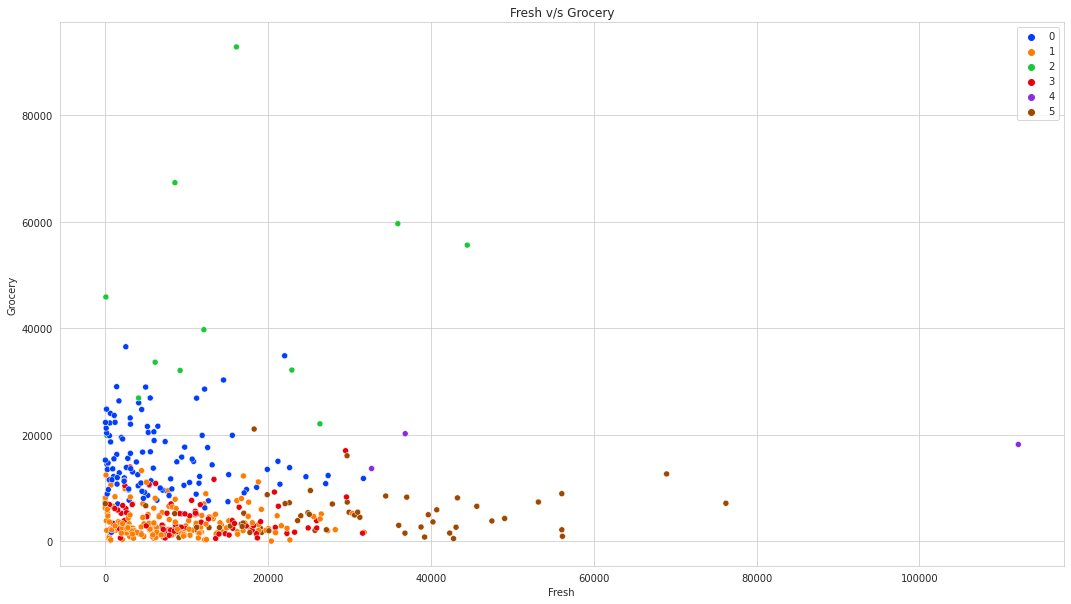

In [65]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,10))
sns.scatterplot(
    data=data,
    x="Fresh",
    y="Grocery",
    hue=ymeans,
    palette='bright'
)
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.title("Fresh v/s Grocery")
plt.show()

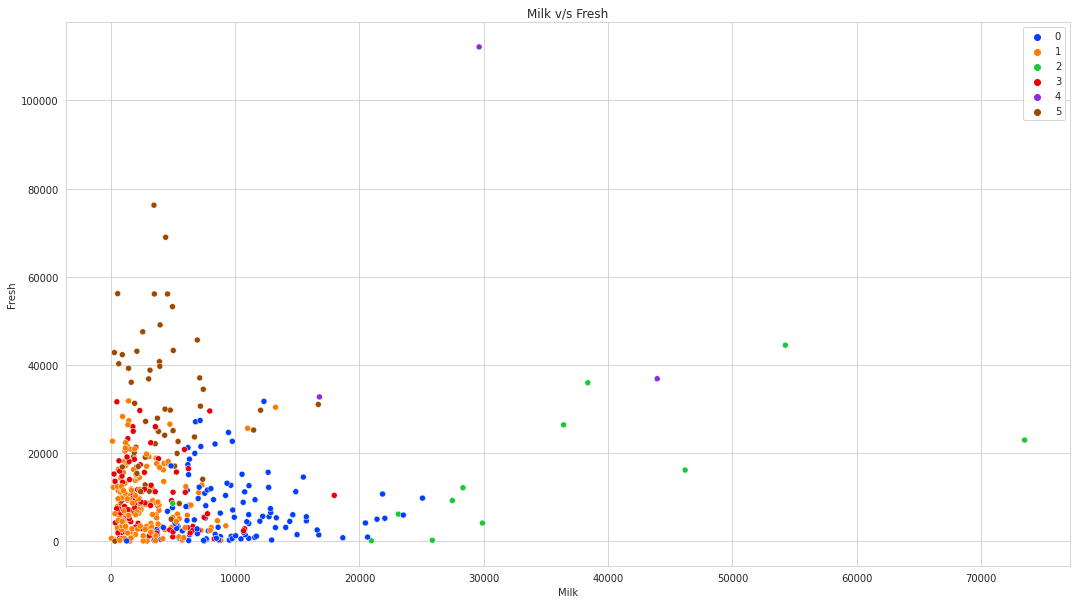

In [66]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,10))
sns.scatterplot(
    data=data,
    x="Milk",
    y="Fresh",
    hue=ymeans,
    palette='bright'
)
plt.xlabel("Milk")
plt.ylabel("Fresh")
plt.title("Milk v/s Fresh")
plt.show()

#Agglomative Hierarchial Clustering

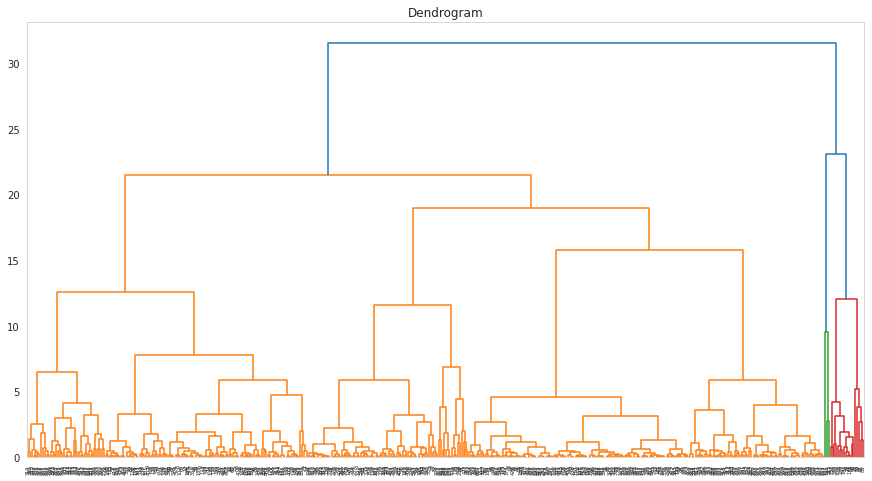

In [67]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,8))
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.grid()
plt.show()

Optimum number of clusters = 3

In [68]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

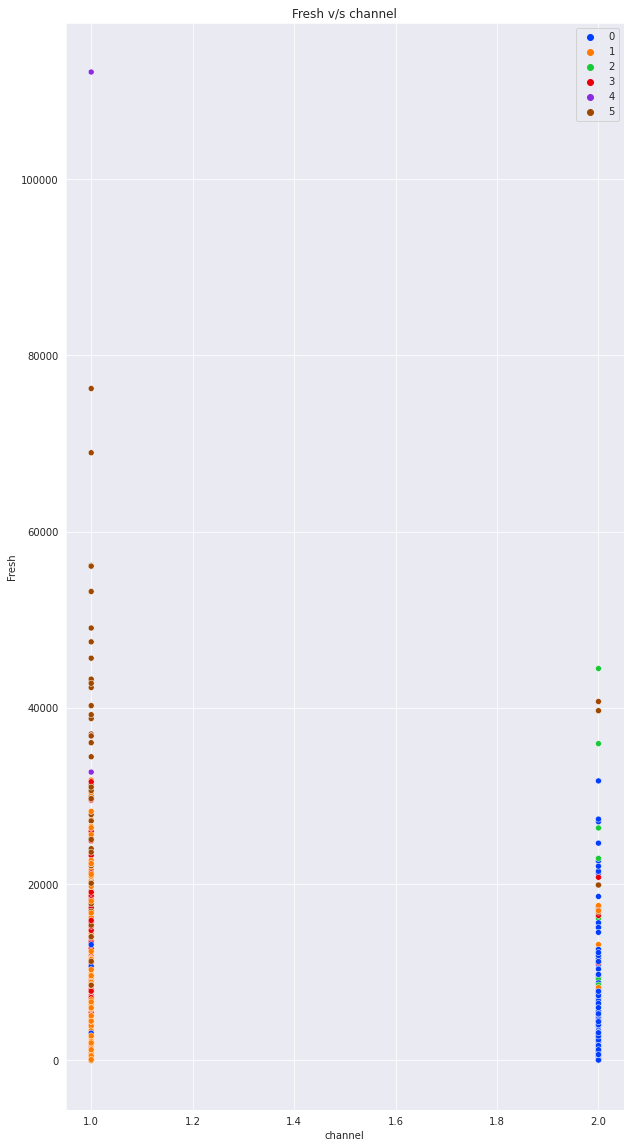

In [69]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,20))
sns.scatterplot(
    data=data,
    x='Channel',
    y="Fresh",
    hue=ymeans,
    palette='bright'
)
plt.xlabel("channel")
plt.ylabel("Fresh")
plt.title("Fresh v/s channel")
plt.show()


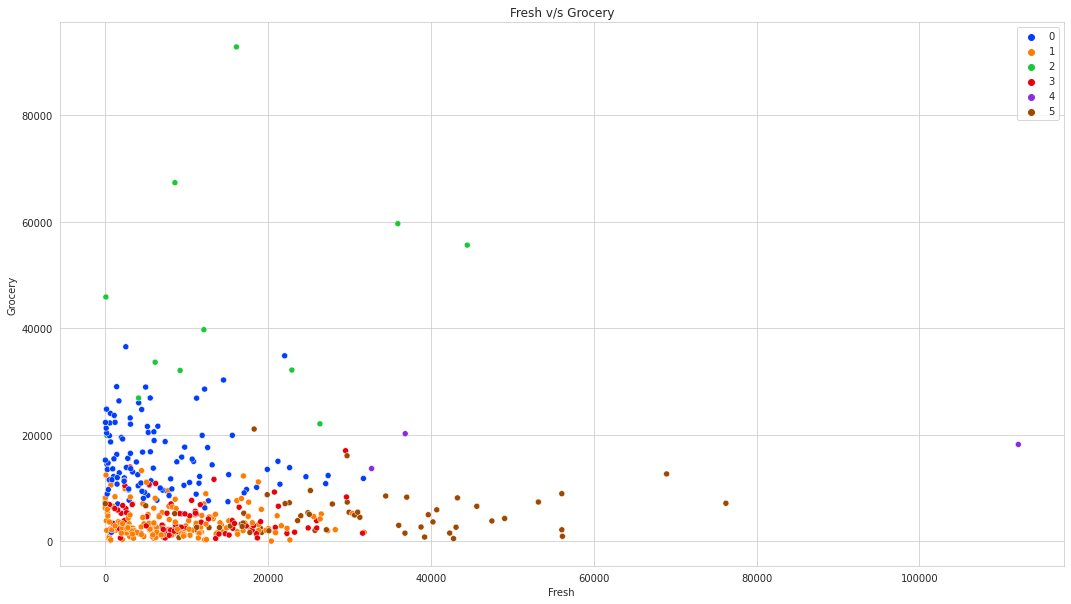

In [70]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,10))
sns.scatterplot(
    data=data,
    x="Fresh",
    y="Grocery",
    hue=ymeans,
    palette='bright'
)
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.title("Fresh v/s Grocery")
plt.show()

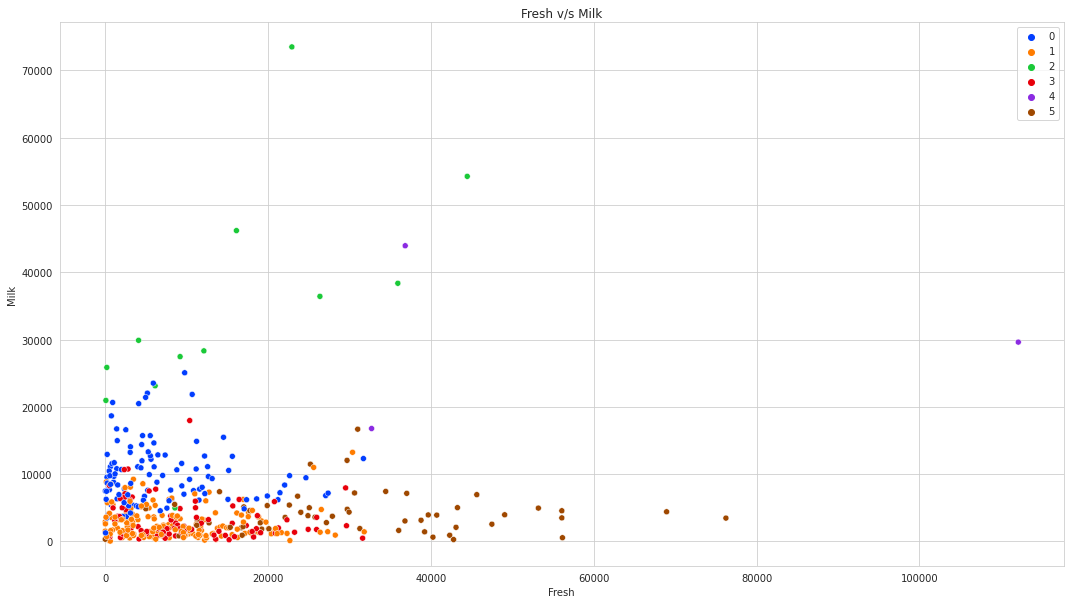

In [71]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,10))
sns.scatterplot(
    data=data,
    x="Fresh",
    y="Milk",
    hue=ymeans,
    palette='bright'
)
plt.xlabel("Fresh")
plt.ylabel("Milk")
plt.title("Fresh v/s Milk")
plt.show()